<a href="https://colab.research.google.com/github/ijethmal/SC3000/blob/main/Agents_Evaluation_and_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC3000 CartPole Assignment

### In this project, we trained 3 different types of reinforcement learning agents and evaluate them in this file.

### **Breakdown**:
Isha: Monte Carlo Agent Training and Evaluation

Kwang Chen: Q-Learning Agent Training and Evaluation

Cherng Khai: Deep Q-Network (DQN) Agent Training and Evaluation

### **Our Process**
Monte Carlo, Q-Learning and DQN are 3 different types of Reinforcement Learning algorithms covered in this course. Specifically, they are Model-Free RL algorithms, which means that they figure out the best actions without needing a model of the environment.

Monte Carlo is a model-free RL algorithm that learns by sampling experiences from the environment. Q-Learning, on the other hand, is an algorithm that learns by bootstrapping, which means it updates value estimates by leveraging both immediate and predicted future rewards. Q-Learning uses a Q-Table to store the expected cumulative reward for each state-action pair (Q-values), while DQN replaces the Q-table with a neural network that learns to approximate Q-values.

In this assignment, we compare the capabilities of the three algorithms by training 3 agents and evaluating them in this file. ***The training files, along with explanations of the agents*** are accessible through these links: [Monte Carlo Training](https://github.com/ijethmal/SC3000/blob/main/Monte%20Carlo/MonteCarloAgentTraining.ipynb), [Q-Learning Training](https://github.com/ijethmal/SC3000/blob/main/Q-Learning/Q%20Learning_Training.ipynb), [DQN Training](https://github.com/ijethmal/SC3000/blob/main/Deep%20Q-Learning/DeepQLearning_Training.ipynb).

## Evaluation of Q-Learning Agent

To recap,

*Action Selection Strategy: Epsilon-Greedy.* The epsilon-greedy approach selects the action with the highest estimated reward most of the time. The implementation is defined within the following code snippet in the training file.
```
for step in range(max_steps):        
        # ε-greedy action selection:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Exploration
        else:
            action = np.argmax(Q[state_disc])    # Exploitation: choose best action
```
The value of *epsilon* determines the amount of exploration and exploitation- so a self.epsilon = 0.2 would mean 20% exploration. If np.random.rand(0,1) returns a value less than epsilon, the agent will explore - which means choose a random action.

*Value Function* is a function that estimates the expected return starting from a given state (or state-action pair) and following a policy. This agent uses action-value function, or *Q-function*, which is a type of value function that estimates the value of taking a specific action (A) in a particular state (S).

In Q-Learning, the expected reward of each state-action pair is stored in a matrix called a Q-table. The Q-function, which outputs the rewards of each state-action pair, uses this as a lookup table.

This algorithm uses *temporal difference Learning*, which refers to the method of updating the Q-function by bootstrapping, meaning it uses the current estimate of the Q-function to update itself, rather than waiting for the final outcome of an episode.

The Q-function *update rule* for this agent is as follows:
```
Q_new(S_t, A_t) = Q_old(S_t, A_t) + α*[R_t+1 + γ*max_a*Q_old(S_t+1, a) - Q_old(S_t, A_t)]
```
where  ```Q(S, A)``` is the estimate of the value of taking action A in state S,

t is the current time step,

α (alpha) is the learning rate, or how much to adjust the estimate,

r is the immediate reward after taking action A, and

γ (gamma) is the discount factor (how much to value future rewards).

The hyperparameters, thus, are alpha, gamma and epsilon. The values have been set in the training file as follows:

alpha = 0.1

gamma = 0.99

epsilon = 0.85

This agent was trained for 20,000 *episodes* (agent-environment interactions from initial to final state) and is evaluated below.


### Import dependencies

In [ ]:
! pip show gym

Name: gym
Version: 0.25.2
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: cloudpickle, gym-notices, numpy
Required-by: dopamine_rl


In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import numpy as np
from collections import deque
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

if not hasattr(np, "bool8"):
    np.bool8 = np.bool_


### Load the trained Q-Learning agent's Q-Table

In [ ]:
Q = np.load("q_learning_q_table.npy")
bins = np.load("q_learning_bins.npy", allow_pickle=True)

### Define the helper functions(same as the Q-Learning training file)

In [ ]:
def create_bins(num_bins, lower_bounds, upper_bounds):
    bins = []
    for i in range(len(num_bins)):
        # Create num_bins[i]-1 cut points between lower and upper bound
        bins.append(np.linspace(lower_bounds[i], upper_bounds[i], num_bins[i] - 1))
    return bins

def discretize_state(state, bins):
    # Map each continuous state value into its corresponding bin index
    return tuple(np.digitize(s, b) for s, b in zip(state, bins))

### Run the evaluation and record the video:

(Warning the block below going to take 3-5 min to execute)

In [ ]:
import gym
import numpy as np
from gym.wrappers import RecordVideo

# Ensure that eval_episodes is defined before using it in the lambda function
eval_episodes = 100

# Create a new evaluation environment with video recording enabled.
video_folder = "evaluation_v"
env_evaluation = gym.make("CartPole-v1", render_mode="rgb_array")
env_evaluation = RecordVideo(
    env_evaluation,
    video_folder=video_folder,
    episode_trigger=lambda ep:ep % 10 == 0,
    name_prefix="evaluation"
)

result = env_evaluation.reset()
observation, info = result[:2]


# Assume discretize_state, bins, and Q are defined elsewhere in your notebook
evaluation_rewards_Q_Learning = []
max_steps = 500

for ep in range(1, eval_episodes + 1):
    state = env_evaluation.reset()
    state_disc = discretize_state(state, bins)
    cumulative_reward = 0
    done = False

    for step in range(max_steps):
        # Pure exploitation: select the best action from Q-table (Pure Greedy)
        action = np.argmax(Q[state_disc])
        next_state, reward, done, info = env_evaluation.step(action)
        cumulative_reward += reward
        state_disc = discretize_state(next_state, bins)

        # Explicitly render the frame so it gets recorded
        env_evaluation.render()

        if done:
            break

    evaluation_rewards_Q_Learning.append(cumulative_reward)
    print(f"Evaluation Episode {ep}: Reward = {cumulative_reward}")

env_evaluation.close()

avg_reward = np.mean(evaluation_rewards_Q_Learning)
print(f"Average Reward over {eval_episodes} evaluation episodes: {avg_reward:.2f}")


Evaluation Episode 1: Reward = 500.0
Evaluation Episode 2: Reward = 500.0
Evaluation Episode 3: Reward = 500.0
Evaluation Episode 4: Reward = 500.0
Evaluation Episode 5: Reward = 500.0
Evaluation Episode 6: Reward = 500.0
Evaluation Episode 7: Reward = 500.0
Evaluation Episode 8: Reward = 500.0
Evaluation Episode 9: Reward = 500.0
Evaluation Episode 10: Reward = 500.0
Evaluation Episode 11: Reward = 500.0
Evaluation Episode 12: Reward = 500.0
Evaluation Episode 13: Reward = 500.0
Evaluation Episode 14: Reward = 500.0
Evaluation Episode 15: Reward = 500.0
Evaluation Episode 16: Reward = 500.0
Evaluation Episode 17: Reward = 500.0
Evaluation Episode 18: Reward = 500.0
Evaluation Episode 19: Reward = 500.0
Evaluation Episode 20: Reward = 500.0
Evaluation Episode 21: Reward = 500.0
Evaluation Episode 22: Reward = 500.0
Evaluation Episode 23: Reward = 500.0
Evaluation Episode 24: Reward = 500.0
Evaluation Episode 25: Reward = 500.0
Evaluation Episode 26: Reward = 500.0
Evaluation Episode 27

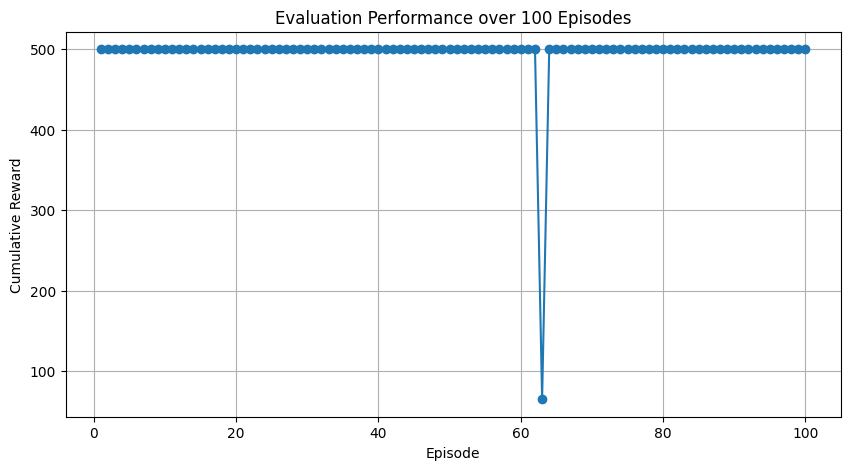

Average Reward over 100 evaluation episodes: 495.65


In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(range(1, eval_episodes + 1), evaluation_rewards_Q_Learning, marker='o', linestyle='-')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Evaluation Performance over 100 Episodes")
plt.grid(True)
plt.show()

# Also print the average reward
avg_reward = np.mean(evaluation_rewards_Q_Learning)
print(f"Average Reward over {eval_episodes} evaluation episodes: {avg_reward:.2f}")


### Evaluation of Video

In [ ]:
from IPython.display import Video
Video("./evaluation_v/evaluation-episode-90.mp4", embed=True)


## Evaluation of Monte Carlo Agent

This agent implements the *Epsilon-Greedy* action selection strategy as well. Similar to the Q-Learning algorithm, the implementation is defined within the following code snippet in the training file.
```
def choose_action(self, state):
      # epsilon-greedy action selection
      if np.random.uniform(0, 1) < self.epsilon:
        return np.random.choice(self.action_space_size) # explore
      else:
        return np.argmax([self.Q[(state, a)] for a in range(self.action_space_size)]) # exploit
```
The value of *epsilon* determines the amount of exploration and exploitation. A high epsilon encourages more exploration, while a low epsilon favors exploiting the current best actions. In order to optimize this agent for this problem, we experimented with different values of epsilon (see training file) to determine the best value of 0.99.

The value function used for this agent was also Q-function. Our agent interacts with the environment, runs full episodes and after each episode, runs update_Q to update its Q-value estimates. The update rule in update_Q updates the Q-value of a state-action pair using the following formula, just like in Q-Learning:
```
Q_new(S_t, A_t) = Q_old(S_t, A_t) + α*[R_t+1 + γ*max_a*Q_old(S_t+1, a) - Q_old(S_t, A_t)]
```
The formula updates Q-value of a state-action pair (Q(s,a)) based on the difference between the actual return (G) observed during an episode and the current estimated Q-value. The learning rate (alpha) controls the magnitude of this adjustment. This is **Monte Carlo Q-Evaluation**.

The key difference between the Monte Carlo agent and the Q-Learning agent is that the MC agent only updates the Q-table after a full *episode*, unlike Q-Learning which updates the table after each *step*.

The challenge of MC algorithm, thus, is that it updates value estimates based on the entire episode's return, which can be noisy and lead to unstable updates.
In order to get the optimal values of the hyperparameters alpha, gammma and epsilon, we ran a few trials of 500 episodes each where varyig values of the 3 hyperparameters were used, until we arrived at the optimal values set as follows:

alpha = 0.05

gamma = 0.99

epsilon = 0.15

This agent was trained in a separate file and is evaluated below.

### Import dependencies

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
from abc import ABC, abstractmethod
from typing import NamedTuple
import pickle
from collections import defaultdict

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data=''''''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


In [ ]:
env = gym.make("CartPole-v1")
env.reset()


array([-0.01682444,  0.00357687,  0.04592457,  0.02068764], dtype=float32)

In [ ]:

print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


### define observation class and helper function: discretize state

In [ ]:

class Observation(NamedTuple):
    cart_pos: int
    cart_vel: int
    pole_angle: int
    pole_vel: int

def discretize_state(observation):
  #
    cart_pos_bins = np.linspace(-4.8, 4.8, 10)
    cart_vel_bins = np.linspace(-5, 5, 10)
    pole_angle_bins = np.linspace(-0.418, 0.418, 10)
    pole_vel_bins = np.linspace(-5, 5, 10)

    return Observation(
        np.digitize(observation[0], cart_pos_bins),
        np.digitize(observation[1], cart_vel_bins),
        np.digitize(observation[2], pole_angle_bins),
        np.digitize(observation[3], pole_vel_bins)
    )

### Define MonteCarlo Agent

In [ ]:
class MonteCarloAgent: # random default values for hyperparameters
    def __init__(self, action_space_size, load_from_file=True, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995):
      self.action_space_size = action_space_size
      self.alpha = alpha  # learning rate
      self.gamma = gamma  # discount factor
      self.epsilon = epsilon  # exploration %
      self.epsilon_min = epsilon_min
      self.epsilon_decay = epsilon_decay

      # use defaultdict to dynamically store Q-values
      self.Q = defaultdict(lambda: 10)  # high Q-values for optimism
      self.returns = defaultdict(list)
      self.N = defaultdict(int)
      self.filename = "mc_q_table.pkl"

      # load Q-table if available
      if load_from_file:
        self.load_q_table()

    def save_q_table(self):
      with open(self.filename, "wb") as file:
        pickle.dump((dict(self.Q), dict(self.returns), dict(self.N)), file)

    def load_q_table(self):
      try:
        with open(self.filename, "rb") as file:
          self.Q, self.returns, self.N = pickle.load(file)
          self.Q = defaultdict(int, self.Q)
          self.returns = defaultdict(list, self.returns)
          self.N = defaultdict(int, self.N)
      except (EOFError, FileNotFoundError):
        print("No saved Q-table found. starting fresh.")


    # decay epsilon over time to encourage exploitation over time
    def decay_epsilon(self):
      self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def reset_q_table(self):
      self.Q = defaultdict(lambda: 10)
      self.returns = defaultdict(list)
      self.N = defaultdict(int)
      self.save_q_table()

    def choose_action(self, state):
      # epsilon-greedy action selection
      if np.random.uniform(0, 1) < self.epsilon:
        return np.random.choice(self.action_space_size) # explore
      else:
        return np.argmax([self.Q[(state, a)] for a in range(self.action_space_size)]) # exploit

    # update_Q will be called at the end of each episode. it takes the entire episode's experience as input
    # and calculates the return G for each state-action pair throughout the episode and accumulating the
    # rewards. Q-value for each state-action pair is updated using the calculated return G
    def update_Q(self, episode):
      G = 0
      visited_state_action_pairs = set()

      for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = self.gamma * G + reward

        # first-visit Monte Carlo - compared to every-visit, often preferred due to its faster convergence
        if (state, action) not in visited_state_action_pairs:
          visited_state_action_pairs.add((state, action))
          self.returns[(state, action)].append(G)
          self.N[state, action] += 1

          # updating Q-value using the learning rate (alpha)
          self.Q[state, action] += self.alpha * (G - self.Q[state, action])

      self.save_q_table()  # save progress after every episode


### Run the evaluation and record the video:

In [ ]:
eval_rewards = []
num_eval_episodes = 100
agent = MonteCarloAgent(env.action_space.n, alpha=0.05, gamma=0.99, epsilon=0.15)
env = gym.make("CartPole-v1")
agent = MonteCarloAgent(env.action_space.n, alpha=0.05, gamma=0.99, epsilon=0.15)

for episode_num in range(num_eval_episodes):
  observation = env.reset()
  episode = []
  cumulative_reward = 0
  done = False

  while not done:
    state = discretize_state(observation)
    action = agent.choose_action(state)
    observation, reward, done, info = env.step(action)

    cart_pos, cart_vel, pole_angle, pole_vel = observation

    # termination check based on constraints
    if abs(pole_angle) > 0.2094 or abs(cart_pos) > 2.4:
        done = True  # terminate episode

    episode.append((state, action, reward))
    cumulative_reward += reward

  agent.decay_epsilon()
  eval_rewards.append(cumulative_reward)
  print(f"Evaluation Episode {episode_num + 1}: Reward = {cumulative_reward}")

Evaluation Episode 1: Reward = 124.0
Evaluation Episode 2: Reward = 165.0
Evaluation Episode 3: Reward = 165.0
Evaluation Episode 4: Reward = 317.0
Evaluation Episode 5: Reward = 157.0
Evaluation Episode 6: Reward = 500.0
Evaluation Episode 7: Reward = 260.0
Evaluation Episode 8: Reward = 137.0
Evaluation Episode 9: Reward = 186.0
Evaluation Episode 10: Reward = 140.0
Evaluation Episode 11: Reward = 500.0
Evaluation Episode 12: Reward = 113.0
Evaluation Episode 13: Reward = 446.0
Evaluation Episode 14: Reward = 500.0
Evaluation Episode 15: Reward = 130.0
Evaluation Episode 16: Reward = 500.0
Evaluation Episode 17: Reward = 217.0
Evaluation Episode 18: Reward = 101.0
Evaluation Episode 19: Reward = 404.0
Evaluation Episode 20: Reward = 342.0
Evaluation Episode 21: Reward = 419.0
Evaluation Episode 22: Reward = 95.0
Evaluation Episode 23: Reward = 160.0
Evaluation Episode 24: Reward = 403.0
Evaluation Episode 25: Reward = 165.0
Evaluation Episode 26: Reward = 319.0
Evaluation Episode 27:

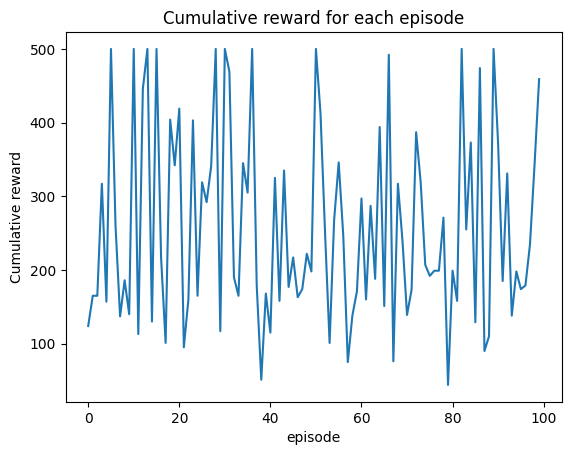

In [ ]:
plt.plot(eval_rewards)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()


In [ ]:

mean = sum(eval_rewards) / len(eval_rewards)
print(mean)


258.14


### Evaluate the video

In [ ]:

env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()

# Assuming you have already defined and trained your MonteCarloAgent (agent)
# and have state_space_size and action_space_size defined

# Initialize the agent here (if not already done)
agent = MonteCarloAgent(env.action_space.n, alpha=0.05, gamma=0.99, epsilon=0.15)

while True:
    env.render()

    # Get the current state and discretize it
    state = discretize_state(observation)

    # Choose an action using the agent's policy
    action = agent.choose_action(state)

    observation, reward, done, info = env.step(action)
    if done:
      break;
env.close()
show_video()

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Evaluation of Deep Q-Network Agent

Deep Q-Network algorithm was created on the basis of a Q-table being insufficient for problems that have enormous state and/or action spaces.

So, this algorithm replaces th Q-table with a 'black box'- which is a *neural network*- to compute the *Q-function*.

The training process involves minimizing the squared Bellman loss, which measures the error between the predicted Q-values (Q(s, a; θ)) and the target Q-values (Q_target(s, a)). The loss function is defined as:
```
L(θ) = Q(S,A;θ) - [R + γ * max_a' * Q(S',A';Θ-)(1-done)]^2
```
where
Q(S,A;θ) is the predicted Q-value for taking action A in state S, as estimated by the DQN network with parameters θ.

R is the immediate reward received after taking action A in state S.

γ (gamma) is the discount factor, which determines the importance of future rewards.

max_a' * Q(S',A';θ-) represents the maximum predicted Q-value for the next state S', considering all possible actions A'. θ- denotes the parameters of a separate target network, which is used to stabilize learning process.

(1 - done) is used to handle terminal states. If the current state is a terminal state (done = True), then the target Q-value is simply the immediate reward R. Otherwise, the target Q-value includes the discounted future reward.

The entire expression is squared to calculate the squared error, which is a common choice for loss functions in regression tasks.

Replay memory is a critical component of the DQN implementation. It stores past experiences in the form of tuples (state, action, reward, next_state, done). In the training process, a batch of experience is randomly sampled from the memory buffer (batch size specified in training file). Random sampling is used to counter temporal correlaton, that is the correlation between consecutive experiences or data points that occur over time, thereby prevent overfitting in the training process.

In DQN, the target Q-values are computed using a separate target network, which is a copy of the main DQN. The parameters of the target network are updated less frequently (e.g., every few episodes) to match the parameters of the main network. This decoupling of the target Q-value computation from the main network's updates helps reduce oscillations and divergence during training.

The target Q-value is computed as:
```
target_Q(S, A) = R + γ * max_a' * Q(S',A';θ-)(1 - done)
```

Going back to the loss function, this project uses the Adam Optimizer to calculate the gradients of L(θ) with respect to the parameters (θ), and updates them in a direction that minimizes loss. The advantage of DQN and this Adam Optimizer is that it uses adaptive learning rates and momentum to make these updates more efficient and stable.

Moreover, due to its function approximation capabilities, it can generalize to unseen states more effectively than the previous 2 algorithms.

### Import Dependencies

In [ ]:
import random
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F
import gym
from collections import deque
import matplotlib.pyplot as plt

import io
import base64
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
from IPython.display import HTML
from IPython import display as ipythondisplay

if not hasattr(np, "bool8"):
    np.bool8 = np.bool_

### Define the DQN network

In [ ]:
# Define DQN network
# DQN network here is a subclass of torch.nn.module
class DQN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DQN, self).__init__()

        # define the first fully connected layer that takes input features
        self.fc1 = torch.nn.Linear(input_dim, hidden_dim)
        # define the second fully connected layer that takes the output of the first layer
        # and maps it to another hidden representation of size 'hidden_dim'
        self.fc2 = torch.nn.Linear(hidden_dim, hidden_dim)
        # Define the output layer that maps the final hidden representation to the Q-values for each action,
        # where 'output_dim' is the number of possible actions
        self.out = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # self.fc1(x) means passing the data through the first layer called self.fc1
        # apply ReLU activation
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.out(x) # return calculated output

### Define the helper function: step_env

In [ ]:
def step_env(env, action):
    result = env.step(action)
    # If 4 values, legacy gym: (next_state, reward, done, info)
    if len(result) == 4:
        next_state, reward, done, info = result
    # If 5 values, new gym API: (next_state, reward, terminated, truncated, info)
    elif len(result) == 5:
        next_state, reward, terminated, truncated, info = result
        done = terminated or truncated
    else:
        raise ValueError("Unexpected number of values returned from env.step()")
    return next_state, reward, done, info

### Define the evaluate_dqn_agent function

In [ ]:
def evaluate_dqn_agent(env, policy_net, episodes=10, max_steps=500):
    """
    Evaluate the trained DQN agent on the given environment.

    Parameters:
        env: Gym environment for evaluation.
        policy_net: The trained DQN policy network.
        episodes: Number of evaluation episodes.
        max_steps: Maximum steps per episode.

    Returns:
        List of cumulative rewards for each episode.
    """
    # Choose the device (CPU or GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    policy_net.eval()  # Set the network in evaluation mode.
    rewards = []

    for episode in range(episodes):
        # Reset the environment and handle the new Gym API format.
        result = env.reset(return_info=True)
        state = result[0] if isinstance(result, tuple) else result
        state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
        cumulative_reward = 0

        for t in range(max_steps):
            # Use the policy network to select an action.

            env.render()
            with torch.no_grad():
                q_values = policy_net(state)
                action = q_values.argmax().item()
            next_state, reward, done, info = step_env(env, action)
            cumulative_reward += reward
            # Handle possible tuple in the next state.
            if isinstance(next_state, tuple):
                next_state = next_state[0]
            state = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)

            if done:
                break

        rewards.append(cumulative_reward)
        print(f"Evaluation Episode {episode+1}: Reward = {cumulative_reward}")

    avg_reward = np.mean(rewards)
    print(f"Average Reward over {episodes} evaluation episodes: {avg_reward:.2f}")
    return rewards


### Initialize the DQN model

In [ ]:
# Set up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model architecture exactly as used during training.
input_dim = 4     # For CartPole-v1, there are 4 state values.
hidden_dim = 64   # Hidden layer size must be the same as in training.
output_dim = 2    # For CartPole-v1, there are 2 possible actions.

# Initialize the model and load the saved state dictionary.
policy_net = DQN(input_dim, hidden_dim, output_dim).to(device)
# Load the saved state dictionary into the policy network from the 'policy_net.pth' file,
policy_net.load_state_dict(torch.load("policy_net.pth", map_location=device))
policy_net.eval()  # Set the model to evaluation mode




DQN(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)

### Run the evaluation and record the video:

In [ ]:
# Setup the evaluation environment with video recording enabled.
video_folder = "evaluation_videos"
# Define which episode to record. For example, if episodes=10, record the 10th episode (index 9).
eval_episode_to_record = 100

env = gym.make("CartPole-v1",render_mode="rgb_array")
env = RecordVideo(env,
                  video_folder=video_folder,
                  episode_trigger=lambda ep:ep % 10 == 0,
                  name_prefix="evaluation")


evaluation_rewards_for_DeepQ_Learning = evaluate_dqn_agent(env, policy_net, episodes=100)
env.close()

Evaluation Episode 1: Reward = 500.0
Evaluation Episode 2: Reward = 500.0
Evaluation Episode 3: Reward = 500.0
Evaluation Episode 4: Reward = 500.0
Evaluation Episode 5: Reward = 500.0
Evaluation Episode 6: Reward = 500.0
Evaluation Episode 7: Reward = 500.0
Evaluation Episode 8: Reward = 500.0
Evaluation Episode 9: Reward = 500.0
Evaluation Episode 10: Reward = 500.0
Evaluation Episode 11: Reward = 500.0
Evaluation Episode 12: Reward = 500.0
Evaluation Episode 13: Reward = 500.0
Evaluation Episode 14: Reward = 500.0
Evaluation Episode 15: Reward = 500.0
Evaluation Episode 16: Reward = 500.0
Evaluation Episode 17: Reward = 500.0
Evaluation Episode 18: Reward = 500.0
Evaluation Episode 19: Reward = 500.0
Evaluation Episode 20: Reward = 500.0
Evaluation Episode 21: Reward = 500.0
Evaluation Episode 22: Reward = 500.0
Evaluation Episode 23: Reward = 500.0
Evaluation Episode 24: Reward = 500.0
Evaluation Episode 25: Reward = 500.0
Evaluation Episode 26: Reward = 500.0
Evaluation Episode 27

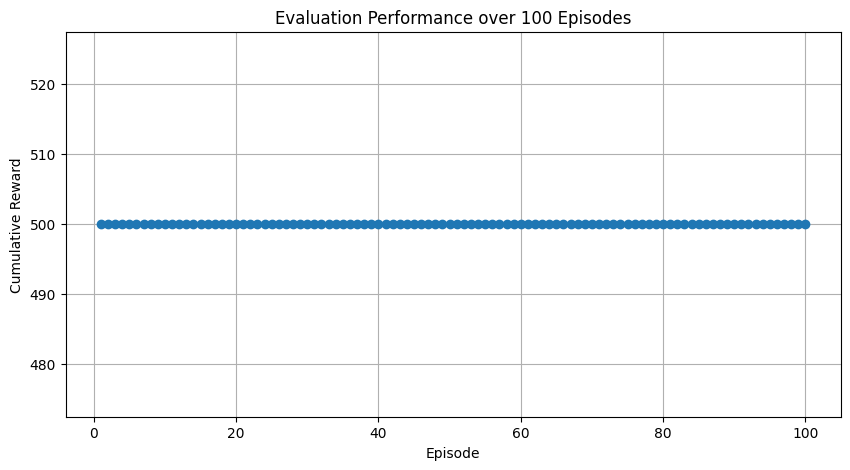

Average Reward over 100 evaluation episodes: 500.00


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, eval_episode_to_record + 1), evaluation_rewards_for_DeepQ_Learning, marker='o', linestyle='-')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Evaluation Performance over 100 Episodes")
plt.grid(True)
plt.show()

# Also print the average reward
avg_reward = np.mean(evaluation_rewards_for_DeepQ_Learning)
print(f"Average Reward over {eval_episode_to_record} evaluation episodes: {avg_reward:.2f}")

### Evaluation of video

In [ ]:
from IPython.display import Video
Video("./evaluation-episode-100.mp4", embed=True)

# Comparisons of graph

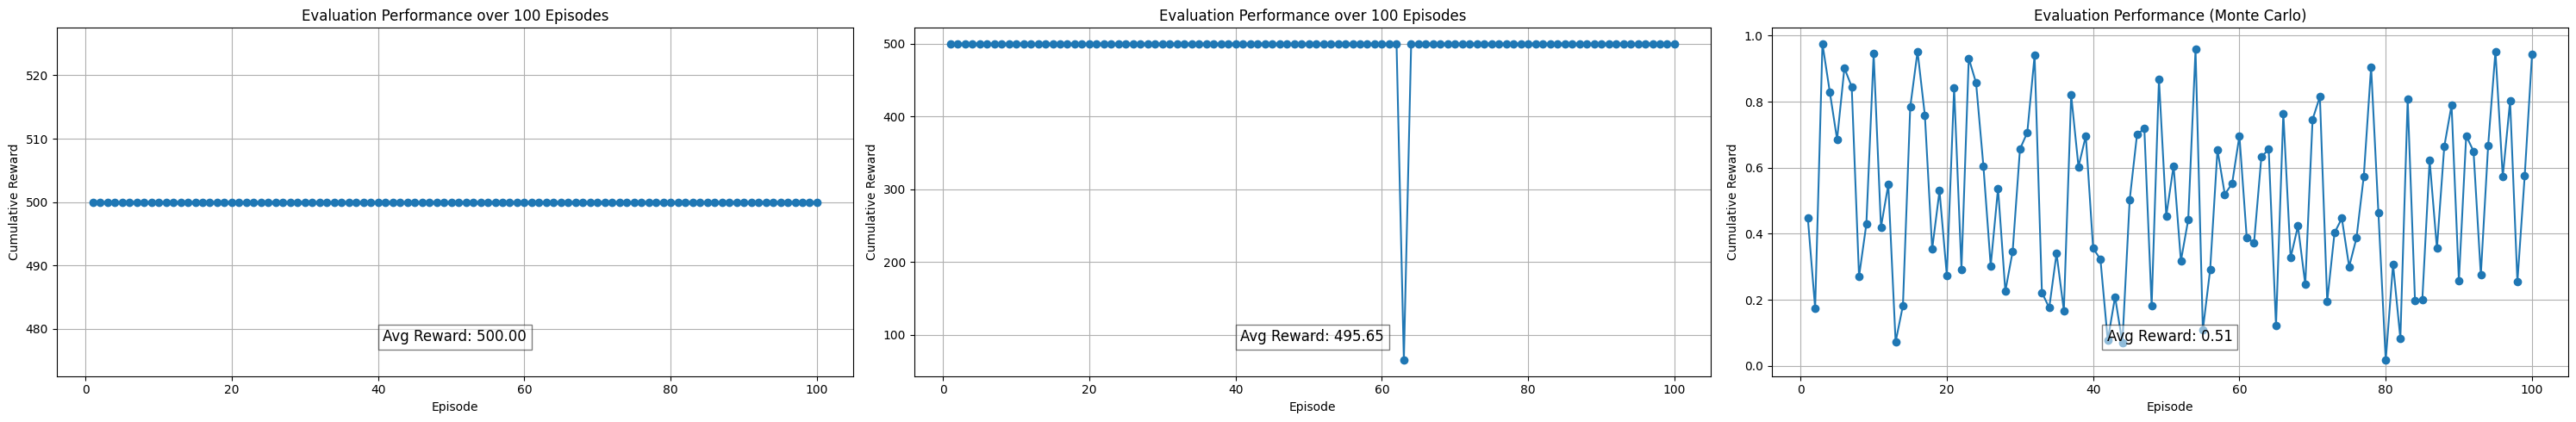

In [ ]:
evaluation_rewards_for_monte_carlo = eval_rewards


import matplotlib.pyplot as plt
import numpy as np

# Example variables (replace these with your actual values)
eval_episode_to_record = 100
eval_episodes = 100

# Example reward data (replace these with your actual reward arrays)
evaluation_rewards = np.random.uniform(low=0, high=1, size=eval_episode_to_record)
evaluation_rewards_for_monte_carlo = np.random.uniform(low=0, high=1, size=eval_episode_to_record)

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(30, 5))

# First subplot: using eval_episode_to_record
axes[0].plot(range(1, eval_episode_to_record + 1), evaluation_rewards_for_DeepQ_Learning, marker='o', linestyle='-')
axes[0].set_xlabel("Episode")
axes[0].set_ylabel("Cumulative Reward")
axes[0].set_title(f"Evaluation Performance over {eval_episode_to_record} Episodes")
axes[0].grid(True)
avg_reward1 = np.mean(evaluation_rewards_for_DeepQ_Learning)
axes[0].text(0.5, 0.1, f"Avg Reward: {avg_reward1:.2f}",
             transform=axes[0].transAxes, horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Second subplot: using eval_episodes
axes[1].plot(range(1, eval_episodes + 1), evaluation_rewards_Q_Learning, marker='o', linestyle='-')
axes[1].set_xlabel("Episode")
axes[1].set_ylabel("Cumulative Reward")
axes[1].set_title(f"Evaluation Performance over {eval_episodes} Episodes")
axes[1].grid(True)
avg_reward2 = np.mean(evaluation_rewards_Q_Learning)
axes[1].text(0.5, 0.1, f"Avg Reward: {avg_reward2:.2f}",
             transform=axes[1].transAxes, horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Third subplot: for evaluation_rewards_for_monte_carlo
axes[2].plot(range(1, len(evaluation_rewards_for_monte_carlo) + 1), evaluation_rewards_for_monte_carlo, marker='o', linestyle='-')
axes[2].set_xlabel("Episode")
axes[2].set_ylabel("Cumulative Reward")
axes[2].set_title("Evaluation Performance (Monte Carlo)")
axes[2].grid(True)
avg_reward3 = np.mean(evaluation_rewards_for_monte_carlo)
axes[2].text(0.5, 0.1, f"Avg Reward: {avg_reward3:.2f}",
             transform=axes[2].transAxes, horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()



From left to right: DQN Performance, Q-Learning Performance, Monte-Carlo Performance.

As expected, DQN performed the best, as it was trained with a neural network and can perform best in new situations.

It is best-suited for the CartPole problem, as the state space is continuous, which the neural network can handle unlike the other 2 algorithms.

Q-Learning performs better than Monte Carlo as the MC agent only updates its Q-table after full episodes, which causes high variance and these agents require lots of training to perform as well as Q-Learning agents, which update their tables after every step instead.

Both Monte Carlo and Q-Learning used epsilon-greedy strategy here to compare the algorithms better. With this strategy, Q-learning, with its more frequent updates, can find a better exploration-exploitation balance more quickly.

Q-learning is well-suited for episodic tasks with well-defined goals, like CartPole where the episode ends when the pole falls or the cart goes out of bounds. It learns fast.

Monte Carlo's reliance on complete episode returns might be less advantageous in this environment, as the length of the episodes and the variance can slow its learning.